### Data Loading & Cleaning

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import warnings
import sys
from pathlib import Path

# Add the parent directory to the system path to import from lib
sys.path.append(str(Path().resolve().parent / 'lib'))

from imdb_data_cleaning import clean_movie_data, map_genres_to_emotions, extract_unique_emotions

# Display options and warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Define genre to emotion mapping
genre_to_emotion = {
    'Action': ['Excited'],
    'Adventure': ['Happy', 'Excited'],
    'Animation': ['Happy', 'Relaxed'],
    'Biography': ['Inspired', 'Down'],
    'Comedy': ['Happy', 'Relaxed'],
    'Crime': ['Scared', 'Excited'],
    'Documentary': ['Inspired'],
    'Drama': ['Down', 'Sweet'],
    'Family': ['Happy', 'Relaxed'],
    'Fantasy': ['Excited', 'Happy'],
    'Film-Noir': ['Scared'],
    'History': ['Inspired', 'Down'],
    'Horror': ['Scared'],
    'Music': ['Happy', 'Inspired'],
    'Musical': ['Happy', 'Relaxed'],
    'Mystery': ['Scared', 'Excited'],
    'Romance': ['Sweet', 'Happy'],
    'Sci-Fi': ['Excited', 'Down'],
    'Sport': ['Inspired'],
    'Thriller': ['Excited', 'Scared'],
    'War': ['Down', 'Inspired'],
    'Western': ['Excited']
}

# Clean data
df = clean_movie_data('../data/imdb.csv')

# Map genres to emotions
df = map_genres_to_emotions(df, genre_to_emotion)

# Extract unique emotions
emotions = extract_unique_emotions(df)

# Display the cleaned dataframe and unique emotions
print(emotions)

{'Sweet', 'Relaxed', 'Inspired', 'Happy', 'Down', 'Scared', 'Excited'}


In [3]:
# df.to_csv('../data/imdb_clean.csv', index=False)

In [4]:
df

,poster,title,year,duration,genre,rating,director,cast,description,emotions
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023,115,"[Comedy, Drama, Romance]",6.4,Michael Showalter,"[Anne Hathaway, Nicholas Galitzine, Ella Rubin...","Solène, a 40-year-old single mom, begins an un...","[Happy, Down, Sweet, Relaxed]"
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023,145,"[Action, Adventure, Sci-Fi]",7.3,Wes Ball,"[Owen Teague, Freya Allan, Kevin Durand, Peter...","Many years after the reign of Caesar, a young ...","[Happy, Down, Excited]"
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023,97,"[Biography, Comedy, History]",5.5,Jerry Seinfeld,"[Isaac Bae, Jerry Seinfeld, Chris Rickett, Rac...","In 1963 Michigan, business rivals Kellogg's an...","[Happy, Down, Relaxed, Inspired]"
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023,126,"[Action, Comedy, Drama]",7.3,David Leitch,"[Ryan Gosling, Emily Blunt, Aaron Taylor-Johns...",A down-and-out stuntman must find the missing ...,"[Sweet, Relaxed, Happy, Down, Excited]"
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023,131,"[Drama, Romance, Sport]",7.7,Luca Guadagnino,"[Zendaya, Mike Faist, Josh O'Connor, Darnell A...","Tashi, a former tennis prodigy turned coach, t...","[Happy, Down, Sweet, Inspired]"
...,...,...,...,...,...,...,...,...,...,...
9995,https://m.media-amazon.com/images/M/MV5BMzg5MW...,The Greatest Show on Earth,2020,152,"[Drama, Family, Romance]",6.5,Cecil B. DeMille,"[James Stewart, Charlton Heston, Betty Hutton,...","The dramatic lives of trapeze artists, a clown...","[Happy, Down, Sweet, Relaxed]"
9996,https://m.media-amazon.com/images/M/MV5BYzA0ZG...,Berserk: Ougon Jidai-hen I - Haou no Tamago,2020,76,"[Animation, Action, Adventure]",7.5,Toshiyuki Kubooka,"[Hiroaki Iwanaga, Carrie Keranen, Takahiro Sak...",A lone sellsword named Guts gets recruited int...,"[Happy, Excited, Relaxed]"
9997,https://m.media-amazon.com/images/M/MV5BM2U1Mj...,Is-slottet,2020,78,"[Mystery, Drama]",6.5,Per Blom,"[Line Storesund, Hilde Nyeggen Martinsen, Mere...",A couple of twelve-year-old Norwegian girls st...,"[Scared, Down, Sweet, Excited]"
9998,https://m.media-amazon.com/images/M/MV5BMTAwOD...,Loving Pablo,2020,123,"[Biography, Crime, Drama]",6.4,Fernando León de Aranoa,"[Javier Bardem, Penélope Cruz, Peter Sarsgaard...",A journalist strikes up a romantic relationshi...,"[Sweet, Inspired, Down, Scared, Excited]"


### Exploratory Analysis

In [5]:
import sys
sys.path.append('../lib')  # Import the lib directory to access the functions
import imdb_data_analysis as eda  # Importing the functions

Top 5 most frequent genres:
genre
Drama        5085
Comedy       3110
Action       2298
Thriller     1707
Adventure    1670
Name: count, dtype: int64


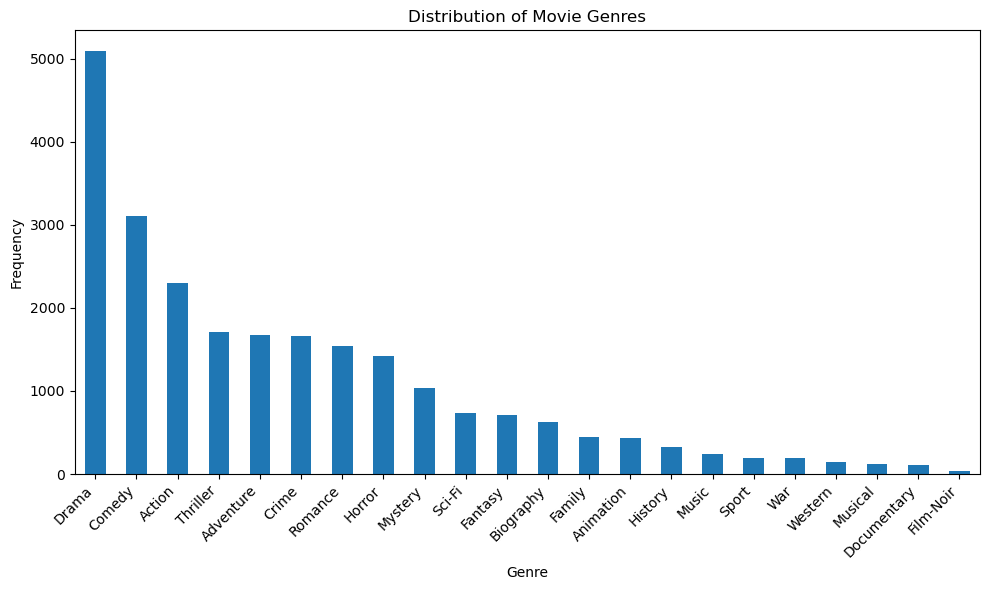

In [6]:
# Distribution of Genres
eda.plot_genre_distribution(df, genre_to_emotion)

Top 5 duration ranges (in minutes):
duration_bins
90-104     3475
105-119    2601
120-134    1287
75-89      1102
135-149     496
Name: count, dtype: int64


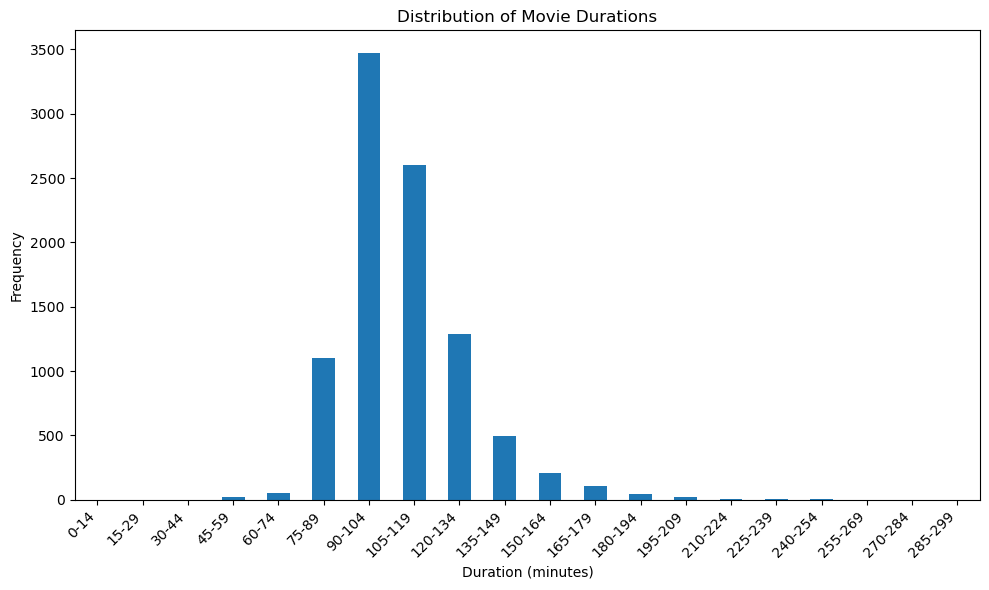

In [7]:
# Distribution of Movie Durations
eda.plot_duration_distribution(df)

Top 5 release year ranges:
year_bins
2019-2023    2206
2014-2018    1346
2004-2008    1014
2009-2013     820
1994-1998     812
Name: count, dtype: int64


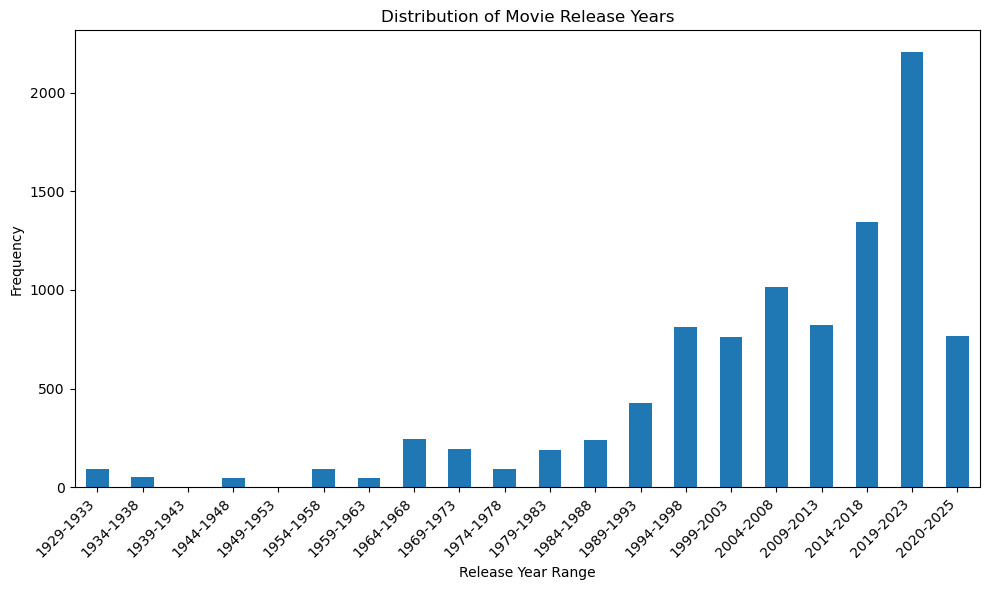

In [8]:
# Distribution of Release Years
eda.plot_year_distribution(df)

Rating stats: 
Min: 1.3, Max: 9.7, Mean: 6.44


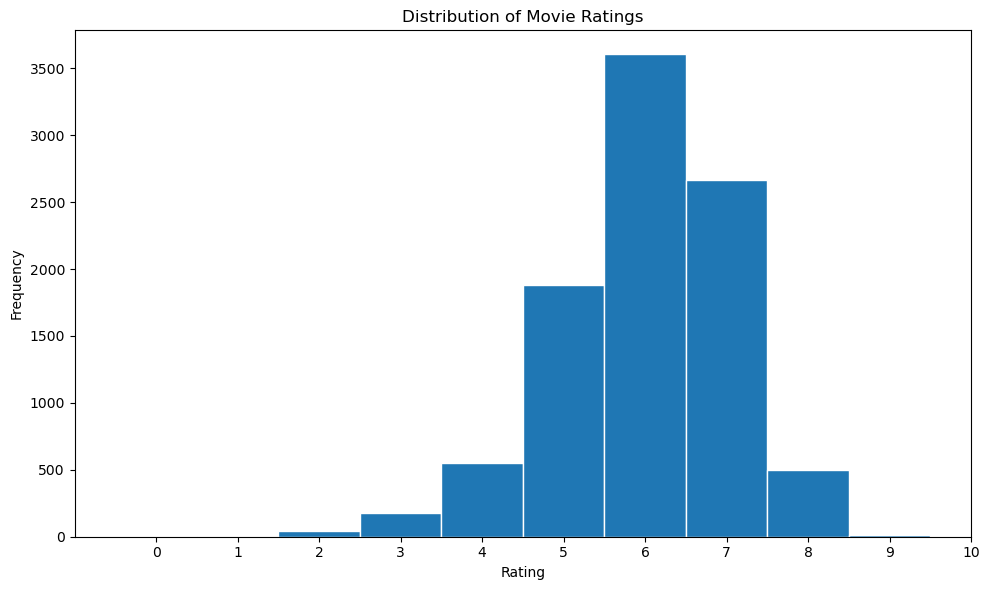

In [9]:
# Distribution of Ratings
eda.plot_rating_distribution(df)

Top 5 emotions:
emotions
Excited    6005
Down       5748
Sweet      5521
Happy      5402
Scared     4037
Name: count, dtype: int64


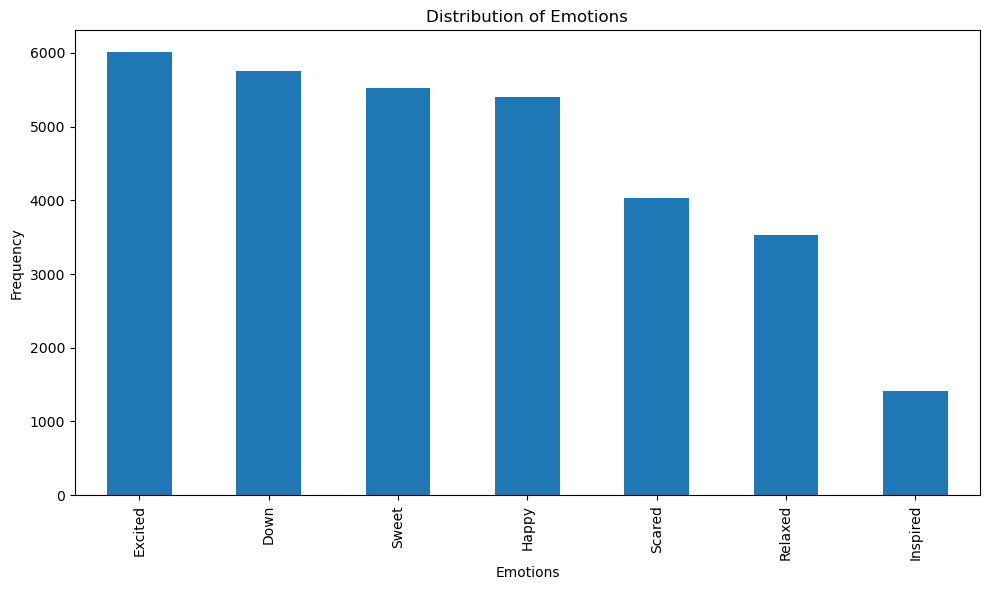

In [10]:
# Distribution of Emotions
eda.plot_emotion_distribution(df)

Genre and Emotion Crosstab:
emotions     Down  Excited  Happy  Inspired  Relaxed  Scared  Sweet
genre                                                              
Action       1046     2298   1277       163      618    1170    732
Adventure     622     1670   1670        80      841     255    435
Animation      75      396    439         9      439      10     68
Biography     631      213    202       631       87     143    564
Comedy       1224     1474   3110       282     3110     638   1475
Crime        1008     1664    499       167      381    1664    968
Documentary    31       28     21       111        7      26      7
Drama        5085     2661   2498      1102     1286    1866   5085
Family        155      267    451        36      451      12    169
Fantasy       269      708    708        16      305     233    288
Film-Noir      27       29      6         0        1      37     28
History       320      107     57       320       17      39    294
Horror        542   

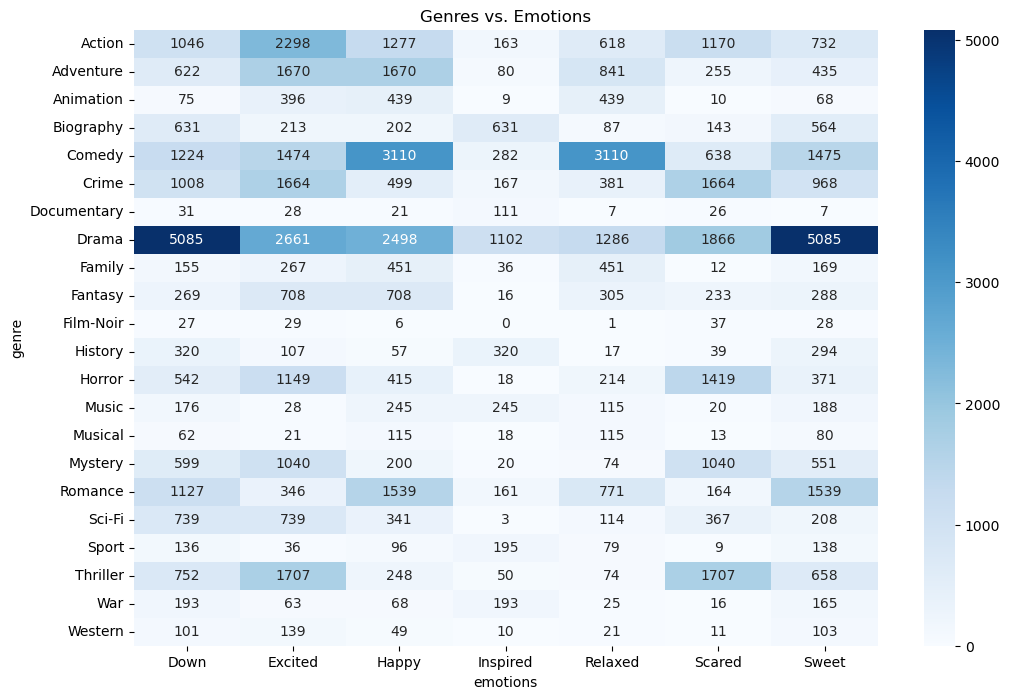

In [11]:
# Crosstab of Genres and Emotions
eda.plot_genre_emotion_crosstab(df)

- **Drama** stands out as the most versatile genre, heavily associated with **Down** (5,085), **Sweet** (5,085), **Happy** (2,498), and **Inspired** (1,102) emotions. It often evokes complex, deep emotional responses.

- **Comedy** is strongly tied to **Happy** (3,110), **Relaxed** (3,110), and **Sweet** (1,475) emotions, as expected for its lighthearted nature.

- **Action** films are highly correlated with **Excited** (2,298), **Happy** (1,277), and **Scared** (1,170), reflecting the thrilling and adrenaline-pumping aspects of the genre.

- **Adventure** also aligns closely with **Excited** (1,670) and **Happy** (1,670), indicating its role in providing enjoyable and exhilarating experiences.

- **Horror** is dominantly linked to **Scared** (1,419) and **Excited** (1,149), showcasing its primary emotional triggers of fear and excitement.

- Each genre has its own emotional signature, with some genres like **Fantasy**, **Romance**, and **Thriller** showcasing a range of emotions from Happy to **Scared** and **Sweet**.

Ratings distribution by emotion:
           count      mean       std  min  25%  50%  75%  max
emotions                                                     
Down      5748.0  6.657811  0.970250  1.9  6.1  6.7  7.3  9.3
Excited   6005.0  6.360899  1.057798  1.3  5.7  6.4  7.1  9.2
Happy     5402.0  6.413588  1.021575  1.3  5.8  6.5  7.1  9.5
Inspired  1413.0  6.928309  0.834510  2.6  6.5  7.0  7.5  9.7
Relaxed   3530.0  6.379263  1.003494  1.3  5.8  6.4  7.1  9.5
Scared    4037.0  6.290661  1.053226  1.7  5.7  6.4  7.0  9.2
Sweet     5521.0  6.668937  0.942847  2.0  6.1  6.7  7.3  9.3


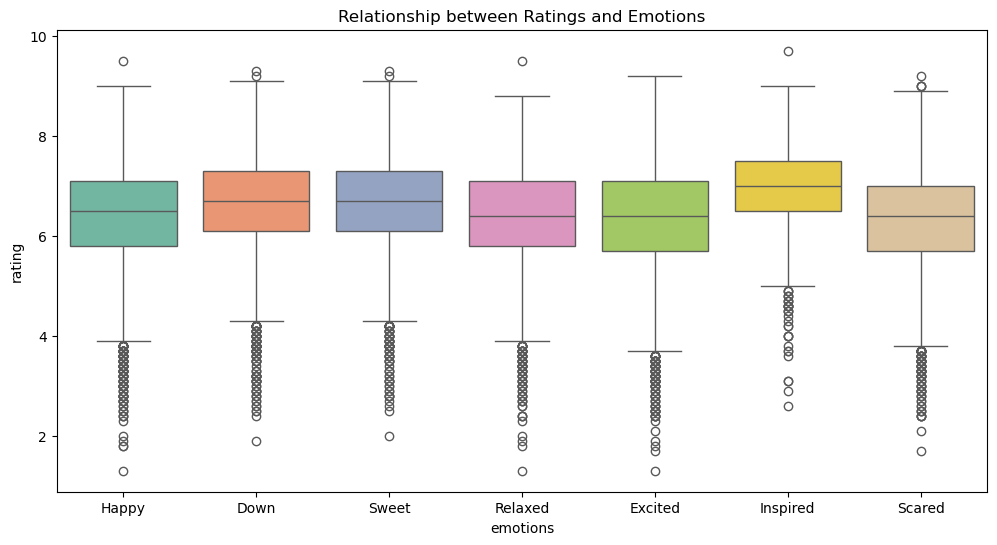

In [12]:
# Relationship between Ratings and Emotions
eda.plot_ratings_vs_emotions(df)

- **Inspired** movies have the highest average rating of 6.93 with a relatively low standard deviation, indicating that these movies tend to be well-received and consistently rated higher.

- **Sweet** and **Down** emotions are closely tied with average ratings of 6.67 and 6.66 respectively, showing that movies invoking sentimental or deep emotions are generally rated favorably.

- **Excited** and **Happy** movies have slightly lower average ratings, 6.36 and 6.41 respectively, with a broader range of ratings, suggesting more variability in how these films are perceived.

- **Scared** and **Relaxed** movies have the lowest average ratings, with Scared movies averaging 6.29, indicating that thrillers and horror movies tend to polarize audiences more.

- Overall, movies that evoke **Inspired**, **Sweet**, and **Down** emotions seem to resonate more positively with audiences than genres focused on excitement or fear.

Top 5 directors:
director
Steven Spielberg     33
Clint Eastwood       32
Ridley Scott         27
Steven Soderbergh    25
Martin Scorsese      24
Name: count, dtype: int64

Top 5 actors:
cast
Nicolas Cage         68
Robert De Niro       64
Bruce Willis         54
Samuel L. Jackson    53
Tom Hanks            52
Name: count, dtype: int64


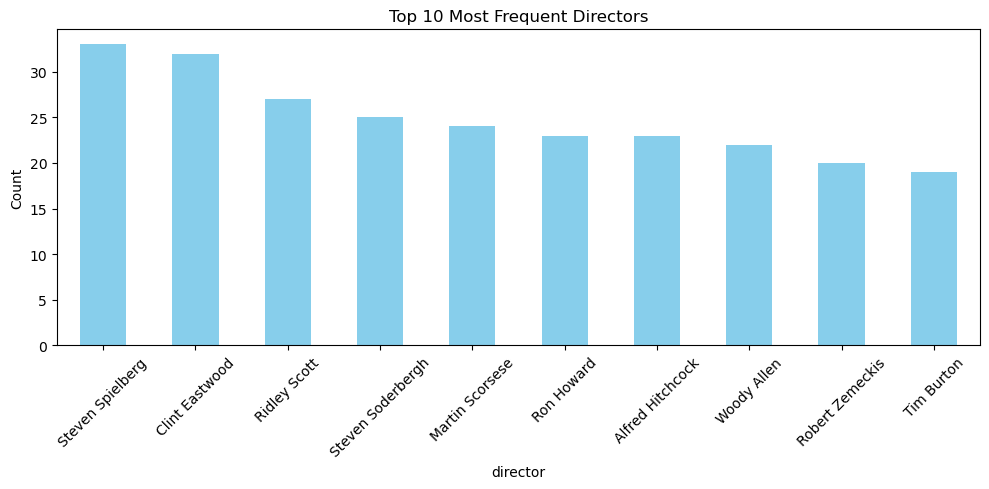

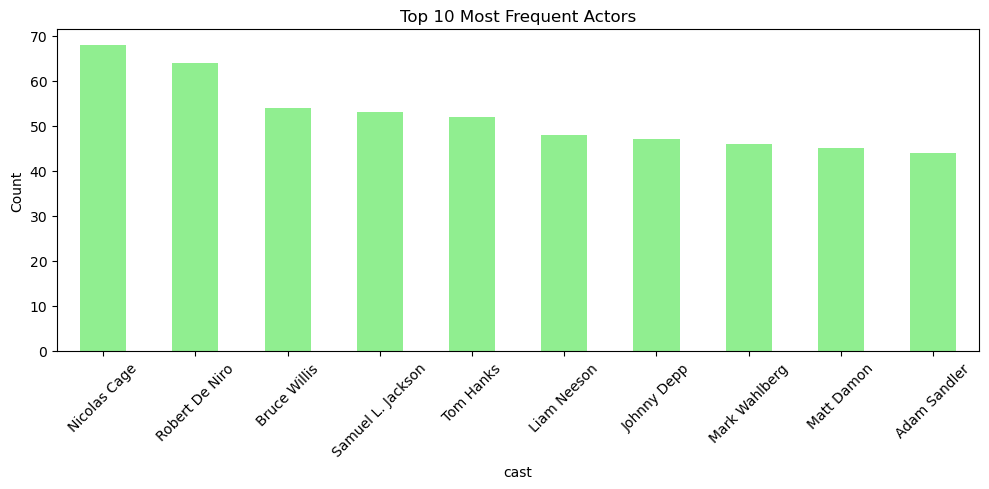

In [13]:
# Analysis of directors and actors
director_counts, actor_counts = eda.analyze_directors_actors(df)

Average ratings over the years:
year
1929    6.489362
1933    6.513043
1934    6.552000
1945    6.169388
1954    6.389130
1955    6.256818
1961    6.288636
1964    6.802041
1965    6.419000
1966    6.302128
1968    6.067347
1969    6.181633
1971    6.404082
1972    6.983333
1973    6.056250
1976    6.247826
1977    6.077778
1979    6.830612
1981    6.308511
1983    5.982609
1985    6.619580
1986    6.144898
1988    6.359574
1989    6.309589
1990    7.238776
1991    7.048889
1992    6.278723
1993    6.434409
1994    6.346939
1995    6.396170
1996    6.504103
1997    6.506250
1998    6.191304
1999    6.355851
2000    6.556250
2001    6.358904
2002    6.414894
2003    6.430303
2004    6.502113
2005    6.607813
2006    6.531488
2007    6.569512
2008    6.255862
2009    6.374150
2010    6.216304
2011    6.105594
2012    6.718930
2013    6.263077
2014    6.367359
2015    6.380083
2016    6.742509
2017    6.456794
2018    6.455155
2019    6.351883
2020    6.377976
2021    6.445679
2022    6.5

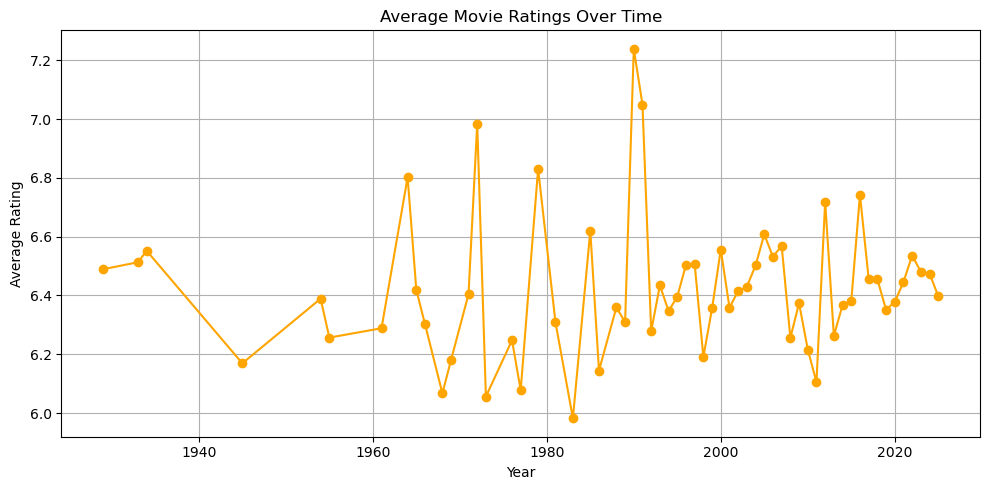

Emotion trends over the years:
emotions  Down  Excited  Happy  Inspired  Relaxed  Scared  Sweet
year                                                            
1929        30       26     27         9       16      15     27
1933        33       24     29        13       20      16     32
1934        30       31     36         7       26      18     30
1945        28       30     28        10       18      22     29
1954        24       26     34         6       25      12     24
1955        27       29     26         2       18      20     29
1961        30       25     26         8       18      17     28
1964        32       37     27         3       12      20     26
1965        66       65     60        14       38      43     67
1966        32       23     26         7       16      22     30
1968        25       30     29         9       21      16     24
1969        29       29     32        12       23      17     29
1971        33       26     26        11       16      16  

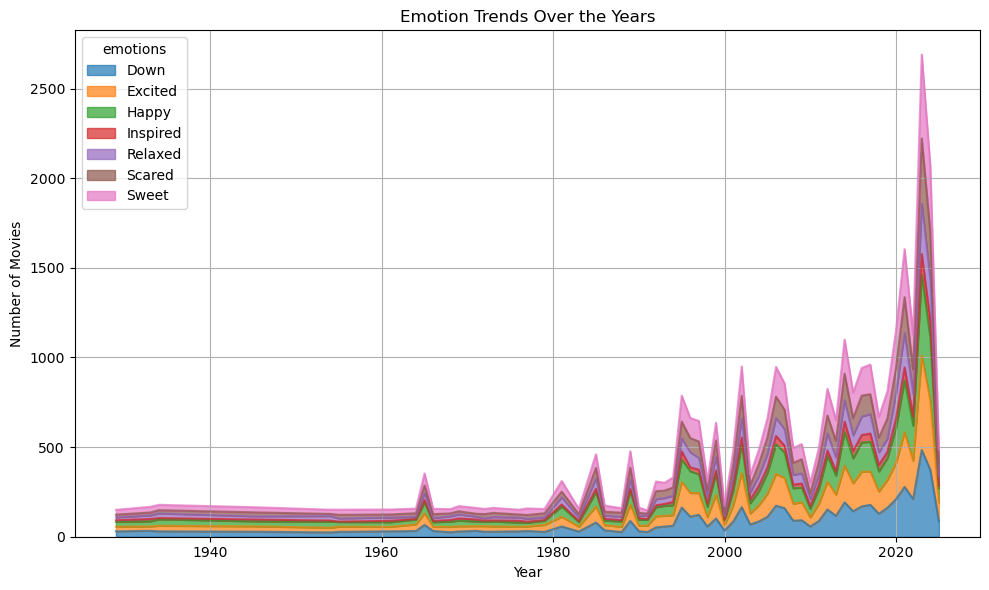

In [14]:
# Time trends analysis
avg_ratings_over_time, emotion_trends = eda.analyze_time_trends(df)

- **1990s Peak in Ratings**: The early 1990s, particularly **1990** with an average rating of **7.24**, followed by **1991** with **7.05**, show a noticeable peak in movie ratings. This indicates that movies released in the early 90s were generally rated higher than those from other decades.

- **Gradual Decline Post-2000**: Starting in the early 2000s, average ratings remain relatively stable but slightly lower compared to the 1990s, with ratings in the **6.5-6.6** range for most years.

- **Fluctuations Over the Decades**: There are periods of variability, such as in **1972** with **6.98**, followed by a drop in the late 70s. The 1980s saw more fluctuation, with **1983** being particularly low with an average of **5.98**.

- **Recent Years**: From **2016** to **2025**, the ratings have been hovering between **6.3** and **6.7**, showing consistency but not reaching the heights of the 90s.

- This suggests that the 1990s could be considered a "golden era" for highly-rated movies, while more recent years show consistent, but slightly lower, average ratings.

- **Overall Increase in Emotions**: There's a clear upward trend in the number of movies associated with emotions over time, especially **after the 2000s**. The jump is particularly noticeable after **2020**, where all emotions, especially Excited, Happy, and Down, see significant increases.

- **Recent Surge (2021-2025)**: The years **2021-2023** show a dramatic rise across all emotions. In particular, Excited and Happy dominate, with **527** and **449** movies, respectively, in 2023.

- **Emotions Before 2000**: Prior to **2000**, the distribution of emotions was relatively stable, with more moderate numbers. The most common emotions throughout this period are Down and Happy, reflecting the popularity of dramas and comedies.

- **Key Emotions**:

    - Excited consistently ranks as one of the top emotions, showing strong growth over the decades.

    - Sweet and Inspired remain relatively lower in frequency compared to emotions like Down and Excited, but they have been steadily increasing since the **2000s**.

This indicates that modern cinema, especially post-2020, tends to evoke more Excited and Happy emotions, reflecting a shift in movie trends and viewer preferences.

Average duration by genre (Top 5):
genre
History        134.309375
War            133.082902
Biography      123.930269
Musical        120.652174
Documentary    114.081081
Name: duration, dtype: float64


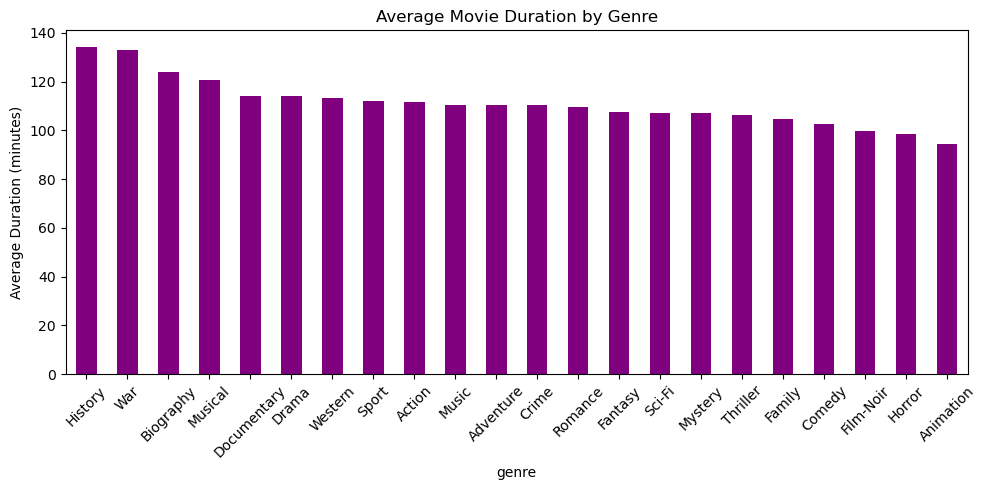

In [15]:
# Genre vs. Furation comparison
genre_duration = eda.compare_genres_durations(df)